In [2]:
conda install -c plotly plotly=4.14.3

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - plotly=4.14.3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py38h578d9bd_1         143 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    plotly-4.14.3              |             py_0         5.9 MB  plotly
    retrying-1.3.3             |             py_2          11 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.3 MB

The following NEW packages will be INSTA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import   StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('NFA 2018.csv')
df

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87015,Luxembourg,LUX,Europe,Western Europe,1999,EFExportsTotGHA,2.727690e+05,38693.594850,529781.310300,38598.597570,0.000000,4.697928e+06,5.577771e+06,87516.400,446000
87016,Luxembourg,LUX,Europe,Western Europe,1999,EFImportsPerCap,9.640340e-01,0.513370,2.175907,0.182401,0.000000,1.672241e+01,2.055812e+01,87516.400,446000
87017,Luxembourg,LUX,Europe,Western Europe,1999,EFImportsTotGHA,4.299939e+05,228981.371100,970532.711500,81357.251260,0.000000,7.458795e+06,9.169660e+06,87516.400,446000
87018,Luxembourg,LUX,Europe,Western Europe,1999,EFProdPerCap,4.959092e-01,0.093481,0.448416,0.000000,0.115181,6.242095e+00,7.395082e+00,87516.400,446000


In [3]:
year_val = df['year'].unique()
print(year_val)

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991]


In [4]:
record_val = df['record'].unique()
print(record_val)

['BiocapPerCap' 'BiocapTotGHA' 'EFConsPerCap' 'EFConsTotGHA'
 'EFExportsPerCap' 'EFExportsTotGHA' 'EFImportsPerCap' 'EFImportsTotGHA'
 'EFProdPerCap' 'EFProdTotGHA']


In [5]:
country_val = df['country'].unique()
print(country_val)

['Armenia' 'Afghanistan' 'Albania' 'Algeria' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Australia' 'Austria' 'Bahamas'
 'Bahrain' 'Barbados' 'Bangladesh' 'Bermuda' 'Bhutan' 'Bolivia' 'Botswana'
 'Brazil' 'Aruba' 'Belize' 'Brunei Darussalam' 'Bulgaria' 'Myanmar'
 'Burundi' 'Cameroon' 'Canada' 'Cabo Verde' 'Cayman Islands'
 'Central African Republic' 'Sri Lanka' 'Chad' 'Chile' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Cuba' 'Cyprus'
 'Czechoslovakia' 'Azerbaijan' 'Benin' 'Denmark' 'Dominica'
 'Dominican Republic' 'Belarus' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Ethiopia PDR' 'Estonia' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Djibouti' 'Georgia' 'Gabon' 'Gambia'
 'Germany' 'Bosnia and Herzegovina' 'Ghana' 'Kiribati' 'Greece' 'Grenada'
 'Guadeloupe' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary'
 'Croatia' 'India' 'Indonesia' 'Iran, Islamic Republic of' 'Iraq'
 'Ireland' 'Israel' 'Italy' "Côte d'Ivoire" 'Kazakhstan' 'Jamai

In [6]:
dataset = df[['country', 'UN_region','year', 'population', 'Percapita GDP (2010 USD)', 'record', 'total']]

In [7]:
dataset

,country,UN_region,year,population,Percapita GDP (2010 USD),record,total
0,Armenia,Asia,1992,3449000,949.033,BiocapPerCap,4.273741e-01
1,Armenia,Asia,1992,3449000,949.033,BiocapTotGHA,1.474227e+06
2,Armenia,Asia,1992,3449000,949.033,EFConsPerCap,1.730092e+00
3,Armenia,Asia,1992,3449000,949.033,EFConsTotGHA,5.967954e+06
4,Armenia,Asia,1992,3449000,949.033,EFExportsPerCap,5.203676e-02
...,...,...,...,...,...,...,...
87015,Luxembourg,Europe,1999,446000,87516.400,EFExportsTotGHA,5.577771e+06
87016,Luxembourg,Europe,1999,446000,87516.400,EFImportsPerCap,2.055812e+01
87017,Luxembourg,Europe,1999,446000,87516.400,EFImportsTotGHA,9.169660e+06
87018,Luxembourg,Europe,1999,446000,87516.400,EFProdPerCap,7.395082e+00


In [9]:
#Reformatage
new_data = pd.DataFrame()
line_index =  0
for i in country_val:
    for j in year_val:
        data = dataset.loc[(dataset['country'] == i) & (dataset['year'] == j), :].reset_index(drop=True)
        if data.shape[0] > 0:
            data_clean = pd.pivot_table(data, values='total', columns= 'record')
            new_data = new_data.append(data_clean, ignore_index=True, verify_integrity=False)

            new_data.loc[line_index, 'country'] = i
            new_data.loc[line_index, 'year'] = j
            new_data.loc[line_index, 'population'] = data.loc[0,'population']
            new_data.loc[line_index, 'Percapita GDP (2010 USD)'] = data.loc[0,'Percapita GDP (2010 USD)']
            new_data.loc[line_index, 'UN_region'] = data.loc[0,'UN_region']

            line_index += 1
        
new_data.head()       

,BiocapPerCap,BiocapTotGHA,EFConsPerCap,EFConsTotGHA,EFExportsPerCap,EFExportsTotGHA,EFImportsPerCap,EFImportsTotGHA,EFProdPerCap,EFProdTotGHA,country,year,population,Percapita GDP (2010 USD),UN_region
0,0.427374,1474226.795,1.730092,5967953.592,0.052037,179500.7888,0.378541,1305775.892,1.403588,4841678.489,Armenia,1992.0,3449000.0,949.033,Asia
1,0.430176,1449550.644,1.158431,3903530.447,0.043202,145577.7965,0.367973,1239947.538,0.833660,2809160.705,Armenia,1993.0,3370000.0,886.033,Asia
2,0.441324,1451930.964,1.115877,3671166.697,0.044654,146907.4052,0.536515,1765102.972,0.624015,2052971.130,Armenia,1994.0,3290000.0,956.471,Asia
3,0.457846,1475715.242,1.028198,3314056.537,0.054844,176772.2410,0.362787,1169323.130,0.720255,2321505.649,Armenia,1995.0,3223000.0,1043.540,Asia
4,0.504369,1600580.482,1.038000,3294021.456,0.046258,146795.4065,0.431828,1370375.583,0.652430,2070441.280,Armenia,1996.0,3173000.0,1121.880,Asia


In [29]:
new_data['year'].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991])

In [30]:
new_data['year'] = new_data['year'].astype('int')
new_data['year'].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991])

In [31]:
#new_data['year'] = new_data['year'].astype(int)

In [32]:
data_final = new_data[['country', 'UN_region', 'year', 'population', 'Percapita GDP (2010 USD)', 'EFExportsTotGHA', 'EFImportsTotGHA', 'EFProdTotGHA', 'BiocapTotGHA']]
data_final

,country,UN_region,year,population,Percapita GDP (2010 USD),EFExportsTotGHA,EFImportsTotGHA,EFProdTotGHA,BiocapTotGHA
0,Armenia,Asia,1992,3.449000e+06,949.033,1.795008e+05,1.305776e+06,4.841678e+06,1.474227e+06
1,Armenia,Asia,1993,3.370000e+06,886.033,1.455778e+05,1.239948e+06,2.809161e+06,1.449551e+06
2,Armenia,Asia,1994,3.290000e+06,956.471,1.469074e+05,1.765103e+06,2.052971e+06,1.451931e+06
3,Armenia,Asia,1995,3.223000e+06,1043.540,1.767722e+05,1.169323e+06,2.321506e+06,1.475715e+06
4,Armenia,Asia,1996,3.173000e+06,1121.880,1.467954e+05,1.370376e+06,2.070441e+06,1.600580e+06
...,...,...,...,...,...,...,...,...,...
8697,World,World,1987,5.033805e+09,6753.800,1.213977e+09,1.228743e+09,1.335642e+10,1.081594e+10
8698,World,World,1988,5.126632e+09,6944.660,1.248564e+09,1.255071e+09,1.362159e+10,1.072463e+10
8699,World,World,1989,5.218978e+09,7081.680,1.255191e+09,1.274438e+09,1.399678e+10,1.089561e+10
8700,World,World,1990,5.309668e+09,7170.350,1.241427e+09,1.265028e+09,1.422085e+10,1.105587e+10


In [33]:
data_final.rename(index=str, columns={'Percapita GDP (2010 USD)': 'Percapita_GDP_2010_USD'}, inplace=True)
data_final.columns

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['country', 'UN_region', 'year', 'population', 'Percapita_GDP_2010_USD',
       'EFExportsTotGHA', 'EFImportsTotGHA', 'EFProdTotGHA', 'BiocapTotGHA'],
      dtype='object')

In [34]:
print("Nombre de ligne : {}".format(data_final.shape[0]))
print()

Nombre de ligne : 8702



In [35]:
data_final.describe(include='all')

,country,UN_region,year,population,Percapita_GDP_2010_USD,EFExportsTotGHA,EFImportsTotGHA,EFProdTotGHA,BiocapTotGHA
count,8702,8702,8702.000000,8.702000e+03,7141.000000,8.702000e+03,8.702000e+03,8.702000e+03,8.702000e+03
unique,196,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sierra Leone,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,54,2769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1989.193059,6.305956e+07,10129.722779,2.464773e+07,2.696064e+07,1.661292e+08,1.356011e+08
std,NaN,NaN,15.491724,4.264615e+08,15647.192957,1.167042e+08,1.204758e+08,1.146272e+09,8.726467e+08
min,NaN,NaN,1961.000000,5.000000e+03,115.794000,3.255577e+00,7.463947e+03,1.746602e+04,6.881474e+03
25%,NaN,NaN,1976.000000,2.001250e+06,988.470000,4.525078e+05,6.293089e+05,3.691057e+06,3.646152e+06
50%,NaN,NaN,1990.000000,6.632500e+06,3153.740000,2.030172e+06,2.606313e+06,1.326049e+07,1.567923e+07
75%,NaN,NaN,2003.000000,2.055950e+07,11972.100000,1.070014e+07,1.215187e+07,4.778909e+07,5.036317e+07


In [36]:
print("Taux de valeurs manquantes: ")
display(100*data_final.isnull().sum()/data_final.shape[0])

Taux de valeurs manquantes: 


country                    0.000000
UN_region                  0.000000
year                       0.000000
population                 0.000000
Percapita_GDP_2010_USD    17.938405
EFExportsTotGHA            0.000000
EFImportsTotGHA            0.000000
EFProdTotGHA               0.000000
BiocapTotGHA               0.000000
dtype: float64

In [37]:
data_final.duplicated().sum()

0

In [38]:
#remplacer les val manquantes avec celles des lignes précédentes
data_final.ffill(inplace=True)
#data_final.fillna(data_final.mode()) #valeur la plus présente
#data_final.dropna(axis=0)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [39]:
print("Taux de valeurs manquantes: ")
display(100*data_final.isnull().sum()/data_final.shape[0])

Taux de valeurs manquantes: 


country                   0.0
UN_region                 0.0
year                      0.0
population                0.0
Percapita_GDP_2010_USD    0.0
EFExportsTotGHA           0.0
EFImportsTotGHA           0.0
EFProdTotGHA              0.0
BiocapTotGHA              0.0
dtype: float64

In [40]:
#les données des pays sauf celle du monde
data_final_word = data_final[(data_final['country'] == 'World')]
data_final_word.head()

,country,UN_region,year,population,Percapita_GDP_2010_USD,EFExportsTotGHA,EFImportsTotGHA,EFProdTotGHA,BiocapTotGHA
8648,World,World,1992,5.485116e+09,7170.32,1.374801e+09,1.402384e+09,1.427988e+10,1.115950e+10
8649,World,World,1993,5.570046e+09,7175.38,1.373962e+09,1.373572e+09,1.426692e+10,1.114595e+10
8650,World,World,1994,5.653316e+09,7281.24,1.468555e+09,1.464028e+09,1.448775e+10,1.124494e+10
8651,World,World,1995,5.735123e+09,7391.47,1.502751e+09,1.490484e+09,1.471590e+10,1.117294e+10
8652,World,World,1996,5.815392e+09,7532.02,1.468454e+09,1.462821e+09,1.507482e+10,1.134654e+10


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Estimation de la distribution')

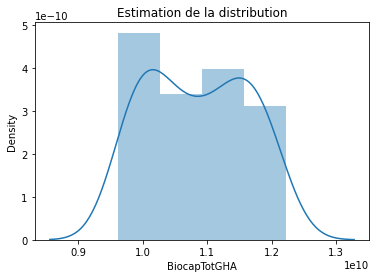

In [42]:
sns.distplot(data_final_word.iloc[:, -1], kde=True)
plt.title('Estimation de la distribution')

In [41]:
import plotly.express as px
fig = px.line(data_frame = data_final_word, 
              x = 'year', 
              y= ['EFExportsTotGHA', 'EFImportsTotGHA', 'EFProdTotGHA', 'BiocapTotGHA'], 
              title = 'Evolution de la Bio capacité et de impreinte carbone dans le temps dans le mode')
fig.show(renderer = 'iframe')


In [79]:
import plotly.express as px
fig = px.line(data_frame = data_final[data_final['country'] == 'Benin'], 
              x = 'year', 
              y= ['EFExportsTotGHA', 'EFImportsTotGHA', 'EFProdTotGHA', 'BiocapTotGHA'], 
              title = 'Evolution de la Bio capacité et de impreinte carbone dans le temps au Bénin')
fig.show(renderer = 'iframe')

## Prediction sur le monde


In [46]:
# Decoupage en variables expicatives et cible
x = data_final_word[['year', 'population', 'Percapita_GDP_2010_USD', 'EFExportsTotGHA', 'EFImportsTotGHA', 'EFProdTotGHA']].values
y = data_final_word['BiocapTotGHA'].values

In [47]:
y[0:5]

array([1.11594975e+10, 1.11459531e+10, 1.12449368e+10, 1.11729414e+10,
       1.13465420e+10])

In [48]:
x[0:5]

array([[1.99200000e+03, 5.48511600e+09, 7.17032000e+03, 1.37480078e+09,
        1.40238397e+09, 1.42798846e+10],
       [1.99300000e+03, 5.57004600e+09, 7.17538000e+03, 1.37396184e+09,
        1.37357174e+09, 1.42669153e+10],
       [1.99400000e+03, 5.65331600e+09, 7.28124000e+03, 1.46855472e+09,
        1.46402786e+09, 1.44877532e+10],
       [1.99500000e+03, 5.73512300e+09, 7.39147000e+03, 1.50275072e+09,
        1.49048420e+09, 1.47159038e+10],
       [1.99600000e+03, 5.81539200e+09, 7.53202000e+03, 1.46845407e+09,
        1.46282073e+09, 1.50748249e+10]])

In [49]:
#decoupage en en train et test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

In [50]:
x_test

array([[1.99100000e+03, 5.39832900e+09, 7.15473000e+03, 1.28181752e+09,
        1.29625570e+09, 1.41682640e+10],
       [1.97100000e+03, 3.75773500e+09, 5.28004000e+03, 7.25826692e+08,
        7.19949298e+08, 1.04015623e+10],
       [1.98600000e+03, 4.94205600e+09, 6.63705000e+03, 1.13094627e+09,
        1.14764487e+09, 1.30134079e+10],
       [1.96400000e+03, 3.25698800e+09, 4.24849000e+03, 5.62081260e+08,
        5.33121334e+08, 7.86463395e+09],
       [2.00300000e+03, 6.36076400e+09, 8.42940000e+03, 1.79928341e+09,
        1.81739292e+09, 1.66873917e+10],
       [1.99400000e+03, 5.65331600e+09, 7.28124000e+03, 1.46855472e+09,
        1.46402786e+09, 1.44877532e+10],
       [1.97000000e+03, 3.68248800e+09, 5.16703000e+03, 7.41223376e+08,
        7.25406909e+08, 1.00523745e+10],
       [1.98000000e+03, 4.43963200e+09, 6.27425000e+03, 1.01483580e+09,
        1.01104548e+09, 1.22835303e+10],
       [1.98300000e+03, 4.68121000e+09, 6.23366000e+03, 1.05317674e+09,
        1.05873265e+09, 

In [51]:
x_test[0]

array([1.99100000e+03, 5.39832900e+09, 7.15473000e+03, 1.28181752e+09,
       1.29625570e+09, 1.41682640e+10])

In [52]:
y_test

array([1.09739300e+10, 1.00779373e+10, 1.07930690e+10, 9.71277438e+09,
       1.15183036e+10, 1.12449368e+10, 9.99235590e+09, 1.03363193e+10,
       1.04781688e+10, 9.91989726e+09, 1.13465420e+10, 1.15445888e+10,
       9.84642766e+09, 1.22213741e+10, 9.93616836e+09, 1.01945303e+10,
       1.01168645e+10])

In [53]:
#normalisation
#stscaler = StandardScaler()
#stscaler.fit(x_train)
#stscaler.fit(x_test)

#x_train = stscaler.transform(x_train)
#x_test = stscaler.transform(x_test)

In [54]:
#x_test

In [55]:
#construction du modele
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [56]:
y_pred = regressor.predict(x_test)

In [57]:
y_pred_2030 = regressor.predict(x_test)

In [58]:
y_pred

array([1.10677166e+10, 9.99768454e+09, 1.07601217e+10, 9.71708103e+09,
       1.16356591e+10, 1.12090106e+10, 9.94432597e+09, 1.04098550e+10,
       1.05899559e+10, 9.87424243e+09, 1.13240351e+10, 1.16002257e+10,
       9.79230581e+09, 1.21571255e+10, 9.91776775e+09, 1.02303812e+10,
       1.02100328e+10])

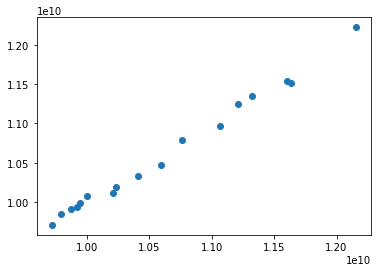

In [59]:
plt.scatter(y_pred, y_test)

0.9916080150546608

### Evaluation

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9916080150546608

In [63]:
#Erreur quadratique_moyenne
erreur_quadratique_moyenne = np.sqrt(np.mean((y_pred - y_test)**2))
erreur_quadratique_moyenne

66271224.8595455

In [64]:
# tableau de bord statistique

import statsmodels.api as sm
model1 = sm.OLS(y_train, x_train)
result = model1.fit()
#print(result.summary())
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1237.
Date:                Tue, 25 May 2021   Prob (F-statistic):           1.06e-34
Time:                        08:54:17   Log-Likelihood:                -711.63
No. Observations:                  37   AIC:                             1435.
Df Residuals:                      31   BIC:                             1445.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.942e+06    9.3e+04     42.390      0.000    3.75e+06    4.13e+06
x2             0.7173      0.080      8.955      0.000       0.554       0.881
x3         -1.638e+04   1.21e+05     -0.136      0.893   -2.62e+05    2.29e+05
x4            -0.2258      0.682     -0.331      0.743      -1.617       1.165
x5             0.1184      0.689      0.172      0.865      -1.287       1.524
x6            -0.0292      0.044     -0.662      0.513      -0.119       0.061
==============================================================================
Omnibus:                        2.607   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                1.487
Skew:                          -0.415   Prob(JB):                        0.475
Kurtosis:                       3.524   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Tous les pays

In [109]:
#les données des pays sauf celle du monde
data_final_allCountry = data_final[(data_final['country'] != 'World')]
data_final_allCountry .head()

,country,UN_region,year,population,Percapita_GDP_2010_USD,EFExportsTotGHA,EFImportsTotGHA,EFProdTotGHA,BiocapTotGHA
0,Armenia,Asia,1992,3449000.0,949.033,179500.7888,1305775.892,4841678.489,1474226.795
1,Armenia,Asia,1993,3370000.0,886.033,145577.7965,1239947.538,2809160.705,1449550.644
2,Armenia,Asia,1994,3290000.0,956.471,146907.4052,1765102.972,2052971.130,1451930.964
3,Armenia,Asia,1995,3223000.0,1043.540,176772.2410,1169323.130,2321505.649,1475715.242
4,Armenia,Asia,1996,3173000.0,1121.880,146795.4065,1370375.583,2070441.280,1600580.482


In [110]:
data_final_allCountry.isnull().sum()

country                   0
UN_region                 0
year                      0
population                0
Percapita_GDP_2010_USD    0
EFExportsTotGHA           0
EFImportsTotGHA           0
EFProdTotGHA              0
BiocapTotGHA              0
dtype: int64

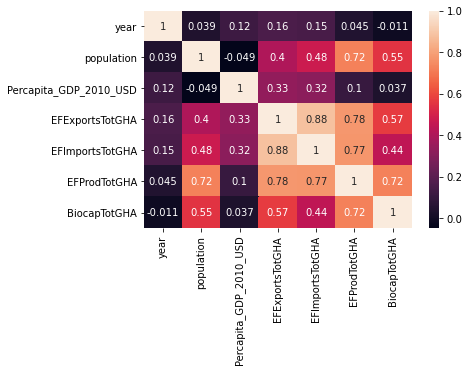

In [111]:
corrMatrix = data_final_allCountry.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

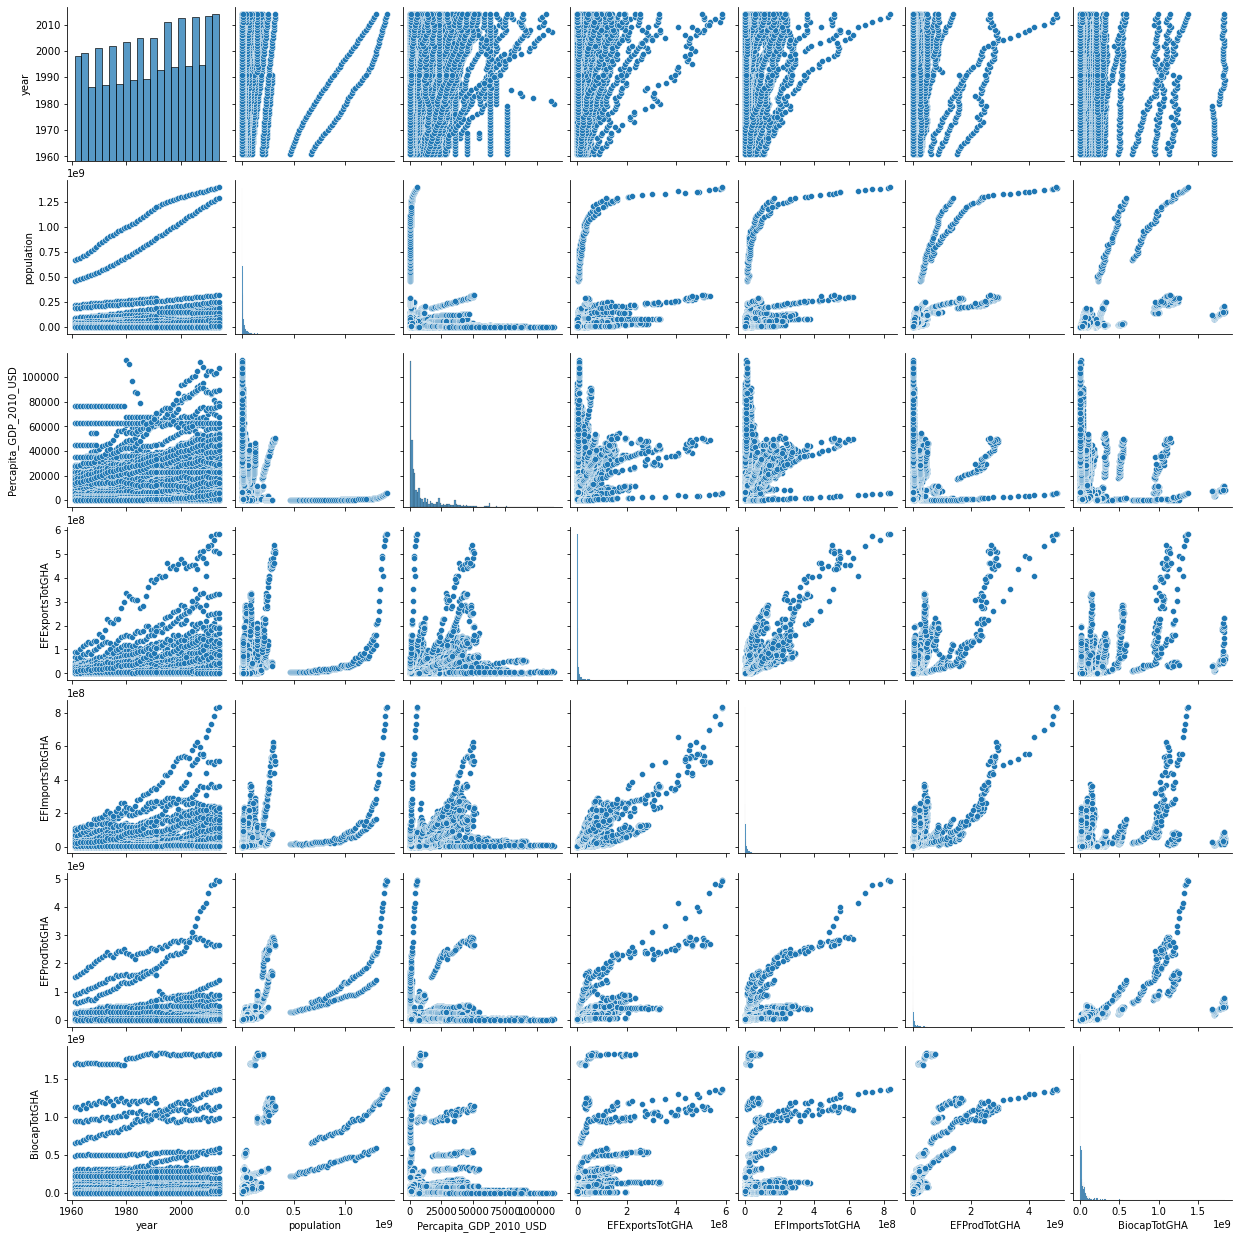

In [112]:
sns.pairplot(data_final_allCountry)

In [113]:
#x = data_final_allCountry[['country','year', 'population', 'Percapita_GDP_2010_USD', 'EFExportsTotGHA', 'EFImportsTotGHA', 'EFProdTotGHA']]

In [115]:
# Decoupage en variables expicatives et cible
features_list = ['country','year', 'population', 'Percapita_GDP_2010_USD', 'EFExportsTotGHA', 'EFImportsTotGHA', 'EFProdTotGHA']
target_variable = 'BiocapTotGHA'
x = data_final_allCountry.loc[:, features_list]
y = data_final_allCountry.loc[:, target_variable]

In [160]:
print("...Done.")
print()

print('y : ')
print(y.head())
print()
print('x :')
print(x.head())

...Done.

y : 
0    1474226.795
1    1449550.644
2    1451930.964
3    1475715.242
4    1600580.482
Name: BiocapTotGHA, dtype: float64

x :
   country  year  population  Percapita_GDP_2010_USD  EFExportsTotGHA  \
0  Armenia  1992   3449000.0                 949.033      179500.7888   
1  Armenia  1993   3370000.0                 886.033      145577.7965   
2  Armenia  1994   3290000.0                 956.471      146907.4052   
3  Armenia  1995   3223000.0                1043.540      176772.2410   
4  Armenia  1996   3173000.0                1121.880      146795.4065   

   EFImportsTotGHA  EFProdTotGHA  
0      1305775.892   4841678.489  
1      1239947.538   2809160.705  
2      1765102.972   2052971.130  
3      1169323.130   2321505.649  
4      1370375.583   2070441.280  


In [161]:
# Détection automatique des positions des caractéristiques numériques/catégorielles
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in x.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)


Found numeric features  ['year', 'population', 'Percapita_GDP_2010_USD', 'EFExportsTotGHA', 'EFImportsTotGHA', 'EFProdTotGHA']  at positions  [1, 2, 3, 4, 5, 6]
Found categorical features  ['country']  at positions  [0]


In [162]:
#encodage des variables de categories
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#LabelEncoder_x = LabelEncoder()
#x[:, 0] = LabelEncoder_x.fit_transform(x[:,0])

In [175]:
# Diviser le jeu de données Train set & Test set 
print("Dividing into train and test sets...")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=0)
print("...Done.")
print()


Dividing into train and test sets...
...Done.



In [176]:
#Convert pandas DataFrames to numpy arrays before using scikit-learn

In [177]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
x_train = x_train.values
x_test = x_test.values
y_train = y_train.tolist()
y_test = y_test.tolist()
print("...Done")

print(x_train[0:5,:])
print(x_test[0:2,:])
print()
print(y_train[0:5])
print(y_test[0:2])


Convert pandas DataFrames to numpy arrays...
...Done
[['Qatar' 1994 495000.0 514.18 3038759.026 1458691.7659999998 6430190.246]
 ['Sierra Leone' 2014 6316000.0 563.174 239412.9351 677461.2082
  7310428.807]
 ['Mauritius' 1964 736000.0 9163.63 124006.5568 502652.2326 291262.0131]
 ['Guyana' 1979 782000.0 1965.74 488177.5027 464660.7267 1562817.945]
 ['Guinea-Bissau' 2011 1674000.0 576.013 526925.003 203872.3042
  2706516.461]]
[['United States of America' 2003 291005000.0 46304.0 450802962.0
  530767700.5 2824628563.0]
 ['Czechoslovakia' 1963 14026000.0 20768.8 2012871.011 8735294.62
  73060761.27]]

[2489299.958, 7909949.071, 898660.8176, 53678079.06, 5042790.975]
[1087789708.0, 32095204.59]


In [178]:
# Missing values
from sklearn.impute import SimpleImputer

print("Imputing missing values...")
print(x_train[0:5,:])
print()
imputer = SimpleImputer(strategy="mean")
x_train[:,numeric_indices] = imputer.fit_transform(x_train[:,numeric_indices])
print("...Fini!")
print(x_train[0:5,:]) 
print()

Imputing missing values...
[['Qatar' 1994 495000.0 514.18 3038759.026 1458691.7659999998 6430190.246]
 ['Sierra Leone' 2014 6316000.0 563.174 239412.9351 677461.2082
  7310428.807]
 ['Mauritius' 1964 736000.0 9163.63 124006.5568 502652.2326 291262.0131]
 ['Guyana' 1979 782000.0 1965.74 488177.5027 464660.7267 1562817.945]
 ['Guinea-Bissau' 2011 1674000.0 576.013 526925.003 203872.3042
  2706516.461]]

...Fini!
[['Qatar' 1994.0 495000.0 514.18 3038759.026 1458691.7659999998
  6430190.246]
 ['Sierra Leone' 2014.0 6316000.0 563.174 239412.9351 677461.2082
  7310428.807]
 ['Mauritius' 1964.0 736000.0 9163.63 124006.5568 502652.2326 291262.0131]
 ['Guyana' 1979.0 782000.0 1965.74 488177.5027 464660.7267 1562817.945]
 ['Guinea-Bissau' 2011.0 1674000.0 576.013 526925.003 203872.3042
  2706516.461]]



In [180]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(x_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

x_train = featureencoder.fit_transform(x_train)
print("...Done")
print(x_train[0:5,:])


Encoding categorical features and standardizing numerical features...

[['Qatar' 1994.0 495000.0 514.18 3038759.026 1458691.7659999998
  6430190.246]
 ['Sierra Leone' 2014.0 6316000.0 563.174 239412.9351 677461.2082
  7310428.807]
 ['Mauritius' 1964.0 736000.0 9163.63 124006.5568 502652.2326 291262.0131]
 ['Guyana' 1979.0 782000.0 1965.74 488177.5027 464660.7267 1562817.945]
 ['Guinea-Bissau' 2011.0 1674000.0 576.013 526925.003 203872.3042
  2706516.461]]
...Done
  (0, 139)	1.0
  (0, 192)	0.30787469776283105
  (0, 193)	-0.2712383312694594
  (0, 194)	-0.622258866420043
  (0, 195)	-0.3014559295711833
  (0, 196)	-0.3344233787700827
  (0, 197)	-0.25816496465337696
  (1, 151)	1.0
  (1, 192)	1.594265444349336
  (1, 193)	-0.21939879437548204
  (1, 194)	-0.6191864173371308
  (1, 195)	-0.3626290928327223
  (1, 196)	-0.34925833773097126
  (1, 197)	-0.2551061492864242
  (2, 113)	1.0
  (2, 192)	-1.6217114221169266
  (2, 193)	-0.26909208004261714
  (2, 194)	-0.07984561744678098
  (2, 195)	-0.365151

In [181]:
# Train model
from sklearn.linear_model import LinearRegression
print("Train model...")
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("...Done.")


Train model...
...Done.


In [187]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(x_train)
print("...Done.")
print(y_train_pred)
print()


Predictions on training set...
...Done.
[ 2141857.06765381  6369409.7472018   1743305.22262821 ...
 17496351.19004664 15757079.42229432  2364600.31199496]



# Test pipeline

In [183]:
# Missing values
print("Imputing missing values...")
print(x_test[0:5,:])
print()

x_test[:,numeric_indices] = imputer.transform(x_test[:,numeric_indices])
print("...Done!")
print(x_test[0:5,:]) 
print() 

Imputing missing values...
[['United States of America' 2003 291005000.0 46304.0 450802962.0
  530767700.5 2824628563.0]
 ['Czechoslovakia' 1963 14026000.0 20768.8 2012871.011 8735294.62
  73060761.27]
 ['Mauritius' 1983 999000.0 2449.29 216917.9803 1208935.0929999999
  547056.1932]
 ['Mali' 1971 6045000.0 363.955 1471035.263 286796.3304 10777082.81]
 ['Sweden' 1984 8334000.0 33484.7 45378934.97 24838600.62 72731324.79]]

...Done!
[['United States of America' 2003.0 291005000.0 46304.0 450802962.0
  530767700.5 2824628563.0]
 ['Czechoslovakia' 1963.0 14026000.0 20768.8 2012871.011 8735294.62
  73060761.27]
 ['Mauritius' 1983.0 999000.0 2449.29 216917.9803 1208935.0929999999
  547056.1932]
 ['Mali' 1971.0 6045000.0 363.955 1471035.263 286796.3304 10777082.81]
 ['Sweden' 1984.0 8334000.0 33484.7 45378934.97 24838600.62 72731324.79]]



In [184]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(x_test[0:5,:])

x_test = featureencoder.transform(x_test)
print("...Done")
print(x_test[0:5,:])


Encoding categorical features and standardizing numerical features...

[['United States of America' 2003.0 291005000.0 46304.0 450802962.0
  530767700.5 2824628563.0]
 ['Czechoslovakia' 1963.0 14026000.0 20768.8 2012871.011 8735294.62
  73060761.27]
 ['Mauritius' 1983.0 999000.0 2449.29 216917.9803 1208935.0929999999
  547056.1932]
 ['Mali' 1971.0 6045000.0 363.955 1471035.263 286796.3304 10777082.81]
 ['Sweden' 1984.0 8334000.0 33484.7 45378934.97 24838600.62 72731324.79]]
...Done
  (0, 182)	1.0
  (0, 192)	0.8867505337267583
  (0, 193)	2.3159294857842
  (0, 194)	2.249253777285725
  (0, 195)	9.483383744323895
  (0, 196)	9.716741855101544
  (0, 197)	9.535030734371666
  (1, 47)	1.0
  (1, 192)	-1.6860309594462517
  (1, 193)	-0.15073656633003193
  (1, 194)	0.6479229649008865
  (1, 195)	-0.32387431336219025
  (1, 196)	-0.1962463660611021
  (1, 197)	-0.026624762272890283
  (2, 113)	1.0
  (2, 192)	-0.3996402128597467
  (2, 193)	-0.2667499054672665
  (2, 194)	-0.5009067223853761
  (2, 195)	-0.

In [186]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(x_test)
print("...Done.")
print(y_test_pred)
print()

Predictions on test set...
...Done.
[1.09511337e+09 3.36391045e+07 1.09377804e+06 ... 6.59127372e+07
 1.40576257e+08 6.63854522e+07]



In [188]:
# Print R^2 scores
from sklearn.metrics import r2_score
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))


R2 score on training set :  0.998958745413434
R2 score on test set :  0.9988227982072522
